In [24]:
import nltk.stem
import string
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, PorterStemmer
import numpy as np

In [25]:
mainDf = pd.read_csv("mainJustice.csv")
mainDf = mainDf.drop(['Unnamed: 0'], axis=1)
mainDf

,ID,facts,issue_area,first_party_winner
0,50606,"<p>In 1970, Jane Roe (a fictional name used in...",3,1
1,50613,<p>Joan Stanley had three children with Peter ...,0,1
2,50623,<p>John Giglio was convicted of passing forged...,1,1
3,50632,"<p>The Idaho Probate Code specified that """"""""m...",0,1
4,50643,"<p>Miller, after conducting a mass mailing cam...",2,1
...,...,...,...,...
3283,63323,<p>Tarahrick Terry pleaded guilty to one count...,3,0
3284,63324,"<p>Refugio Palomar-Santiago, a Mexican nationa...",3,1
3285,63331,<p>Joshua James Cooley was parked in his picku...,0,1
3286,63332,<p>This is an ongoing case of original jurisdi...,3,0


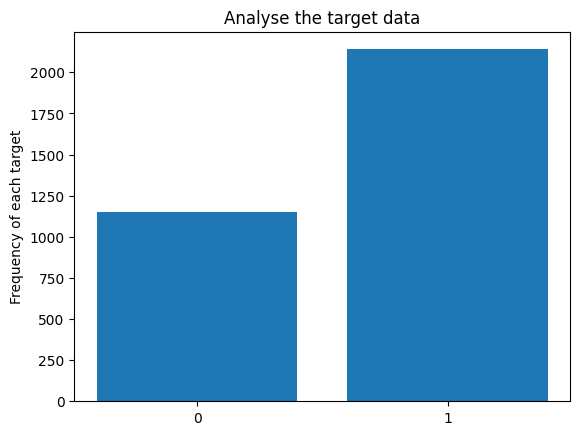

In [26]:
freqTarget = mainDf.groupby(["first_party_winner"], as_index=False, sort=True)["facts"].count()
plt.bar(freqTarget["first_party_winner"], freqTarget["facts"])
plt.xticks(freqTarget["first_party_winner"])
plt.title("Analyse the target data")
plt.ylabel('Frequency of each target')
plt.show()

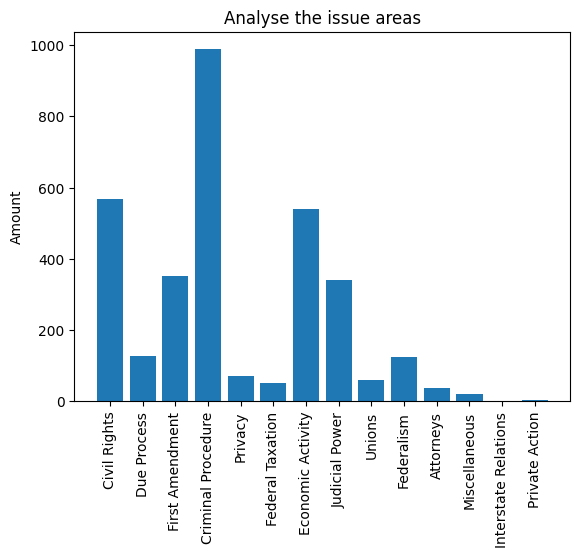

In [27]:
freqTarget = mainDf.groupby(["issue_area"], as_index=False, sort=True)["facts"].count()
vectorIA = ["Civil Rights", "Due Process", "First Amendment", "Criminal Procedure", "Privacy", "Federal Taxation", 
            "Economic Activity", "Judicial Power", "Unions", "Federalism", "Attorneys", "Miscellaneous", 
            "Interstate Relations", "Private Action"]

variableIA = []
for a in freqTarget["issue_area"]:
    variableIA.append(vectorIA[int(a)])

freqTarget["name_issue"] = variableIA

plt.bar(freqTarget["name_issue"], freqTarget["facts"])
plt.xticks(freqTarget["name_issue"])
plt.title("Analyse the issue areas")
plt.xticks(rotation=90)
plt.ylabel('Amount')
plt.show()

In [28]:
documents = []
X = mainDf["facts"]
pattern = r'[' + string.punctuation + ']'

for i in range(0, len(X)):
  document = sample_str = re.sub(pattern, " ", str(X[i]))
  document = re.sub(r"\W", " ", document)
  document = re.sub(r"\d+", " ", document)
  document = re.sub(r'\b\w{1,1}\b', " ", document)
  document = re.sub(" \d+", " ", document)
  document = re.sub(r"\s+", " ", document, flags=re.I)
  document = document.lower()
  documents.append(document)

In [6]:
tokenDocuments = []
for i in range(0, len(X)):
    tokenDocuments.append(word_tokenize(documents[i]))

In [7]:
stop_words = stopwords.words("english")

In [8]:
cleanTokenDocuments = []

for i in range(0, len(X)):
    cleanTokenDocument = []
    for word in tokenDocuments[i]:
        if word not in stop_words:
            cleanTokenDocument.append(word)
    cleanTokenDocuments.append(cleanTokenDocument)
mainDf["facts"] = cleanTokenDocuments

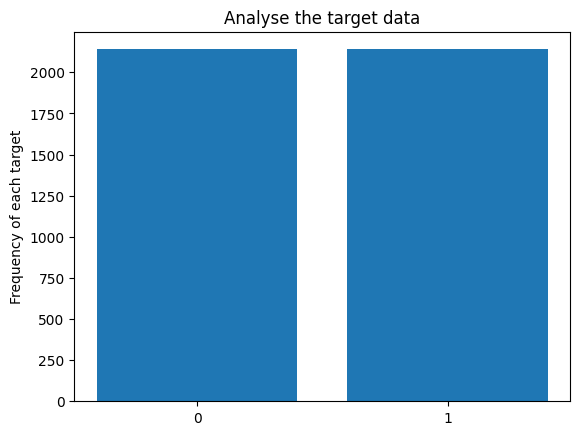

In [9]:
max_size = mainDf["first_party_winner"].value_counts().max() 
lst = [mainDf]
for class_index, group in mainDf.groupby('first_party_winner'):
    lst.append(group.sample(max_size-len(group), replace=True))
balancedMainDf = pd.concat(lst)
balancedMainDf.index = range(len(balancedMainDf))

freqTargetBalanced = balancedMainDf.groupby(["first_party_winner"], as_index=False, sort=True)["facts"].count()

plt.bar(freqTargetBalanced["first_party_winner"], freqTargetBalanced["facts"])
plt.xticks(freqTargetBalanced["first_party_winner"])
plt.title("Analyse the target data")
plt.ylabel('Frequency of each target')
plt.show()

In [10]:
len(balancedMainDf)

4280

In [11]:
lemma = WordNetLemmatizer()

balancedMainDf["lemma"] = balancedMainDf["facts"].apply(lambda x: [lemma.lemmatize(y) for y in x])

In [12]:
postagDocuments = []
for sen in balancedMainDf["lemma"]:
    postagDocuments.append(pos_tag(sen))

balancedMainDf["lemmaPos"] = postagDocuments

In [13]:
words_set = set()
 
for doc in balancedMainDf["facts"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))

Number of words in the corpus: 18889


In [14]:
lemmaWithSomePostagDocuments = []
for sen in balancedMainDf["lemmaPos"]:
    lemmaWithSomePostagDocument = []
    for w in sen:
        if w[1] != "UH" and w[1] != "WP" and w[1] != "WP$" and w[1] != "WRB" and w[1] != "PRP" and w[1] != "PRP$" and w[1] != "MD" and w[1] != "WDT":
            lemmaWithSomePostagDocument.append(w[0])
    lemmaWithSomePostagDocuments.append(lemmaWithSomePostagDocument)
            
balancedMainDf["lemma"] = lemmaWithSomePostagDocuments

In [15]:
words_set = set()
 
for doc in balancedMainDf["lemma"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))

Number of words in the corpus: 16930


In [16]:
words = []
freqOfWords = []

for doc in balancedMainDf["lemma"]:
    for word in doc:
        if word not in words:
            words.append(word)
            freqOfWords.append(1)
        else:
            idx = words.index(word)
            freqOfWords[idx] = freqOfWords[idx] + 1

In [17]:
d = {'words': words, 'frequency': freqOfWords}
freqWordDf = pd.DataFrame(data=d)
freqWordDf = freqWordDf.sort_values(by=['frequency'])

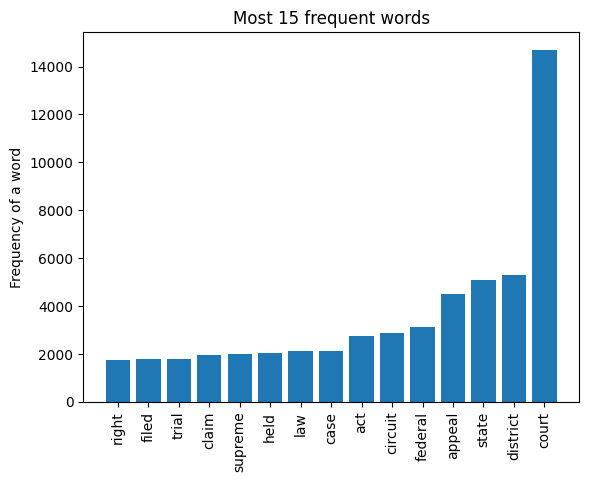

In [18]:
plt.bar(freqWordDf.tail(15)["words"], freqWordDf.tail(15)["frequency"])
plt.xticks(freqWordDf.tail(15)["words"])
plt.title("Most 15 frequent words")
plt.ylabel('Frequency of a word')
plt.xticks(rotation = 90) 
plt.show()

In [23]:
len(balancedMainDf["lemma"][2])

45

In [29]:
words = []
targetVar = []
onesList = []
for row in range(0, len(balancedMainDf["lemma"])):
    for word in balancedMainDf["lemma"][row]:
        words.append(word)
        targetVar.append(balancedMainDf["first_party_winner"][row]) 
        onesList.append(1)

In [30]:
d = {'words': words, 'first_party_winner': targetVar, "listOfOnes": onesList}
freqDf = pd.DataFrame(data=d)

In [31]:
countFreqDf = freqDf.groupby(["first_party_winner", "words"], as_index=False, sort=True)["listOfOnes"].count()

In [68]:
countFreqDfZeros = countFreqDf[countFreqDf['first_party_winner'].isin([0])].sort_values(by=['listOfOnes'])
countFreqDfZeros[countFreqDfZeros["listOfOnes"].isin([1])].count()

first_party_winner    1416
words                 1416
listOfOnes            1416
dtype: int64

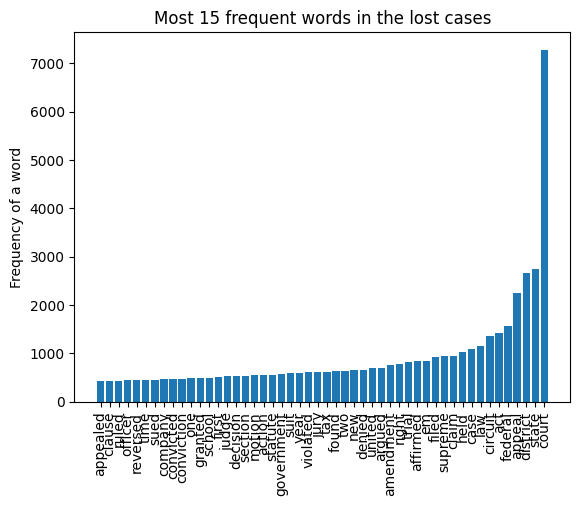

In [34]:
plt.bar(countFreqDfZeros.tail(50)["words"], countFreqDfZeros.tail(50)["listOfOnes"])
plt.xticks(countFreqDfZeros.tail(50)["words"])
plt.title("Most 15 frequent words in the lost cases")
plt.ylabel('Frequency of a word')
plt.xticks(rotation = 90) 
plt.show()

In [69]:
countFreqDfOnes = countFreqDf[countFreqDf['first_party_winner'].isin([1])].sort_values(by=['listOfOnes'])
countFreqDfOnes[countFreqDfOnes["listOfOnes"].isin([1])].count()

first_party_winner    4342
words                 4342
listOfOnes            4342
dtype: int64

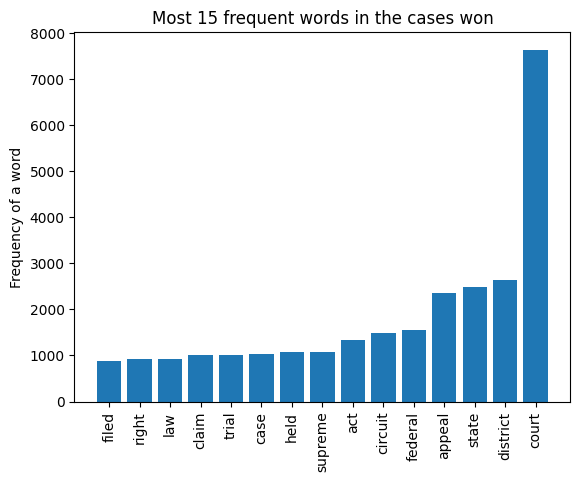

In [37]:
plt.bar(countFreqDfOnes.tail(15)["words"], countFreqDfOnes.tail(15)["listOfOnes"])
plt.xticks(countFreqDfOnes.tail(15)["words"])
plt.title("Most 15 frequent words in the cases won")
plt.ylabel('Frequency of a word')
plt.xticks(rotation = 90) 
plt.show()

In [5]:
from gensim.models import Word2Vec

In [51]:
model = Word2Vec(sentences=balancedMainDf["lemma"], vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [52]:
model = Word2Vec.load("word2vec.model")

In [54]:
vector = model.wv['court']
vector

array([-0.49534872,  1.7015079 , -1.0682205 ,  1.0547068 , -1.2961282 ,
       -2.4827223 ,  1.1575822 ,  2.8550115 , -1.6206298 , -0.46586695,
        0.9689695 , -0.46815103, -0.42838344,  0.38120067,  0.23543361,
       -1.2070445 , -0.45442694,  0.5916262 , -0.7842616 , -2.3530352 ,
        2.0022712 ,  0.0879472 ,  1.6351717 , -0.15861687,  0.7777198 ,
       -0.62335604, -0.46447432,  0.43501928, -0.99310756, -0.9178101 ,
       -0.77870834, -0.39867306,  1.7994252 , -2.6629765 , -0.3262375 ,
        0.6159637 ,  1.7675529 ,  0.0729831 , -0.33560592, -0.15541631,
       -0.61341655,  0.36094928, -1.6164213 , -0.714028  ,  0.41146114,
       -0.5683116 , -0.33139914,  1.5297294 ,  0.9618824 ,  1.5554539 ,
       -0.28091738, -0.26843545, -0.52985877,  0.13482544,  0.6583459 ,
       -0.94044065,  2.2511683 , -0.5829881 , -0.66437495,  1.1917152 ,
       -0.0716043 , -0.11872032, -0.2921954 , -1.1937048 , -0.09485456,
        1.270341  ,  1.2423537 ,  2.0423563 , -2.4257221 ,  0.28